In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
from sklearn.datasets import load_boston

data = load_boston() # reading data

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [3]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [4]:
df['MEDV'] = data.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


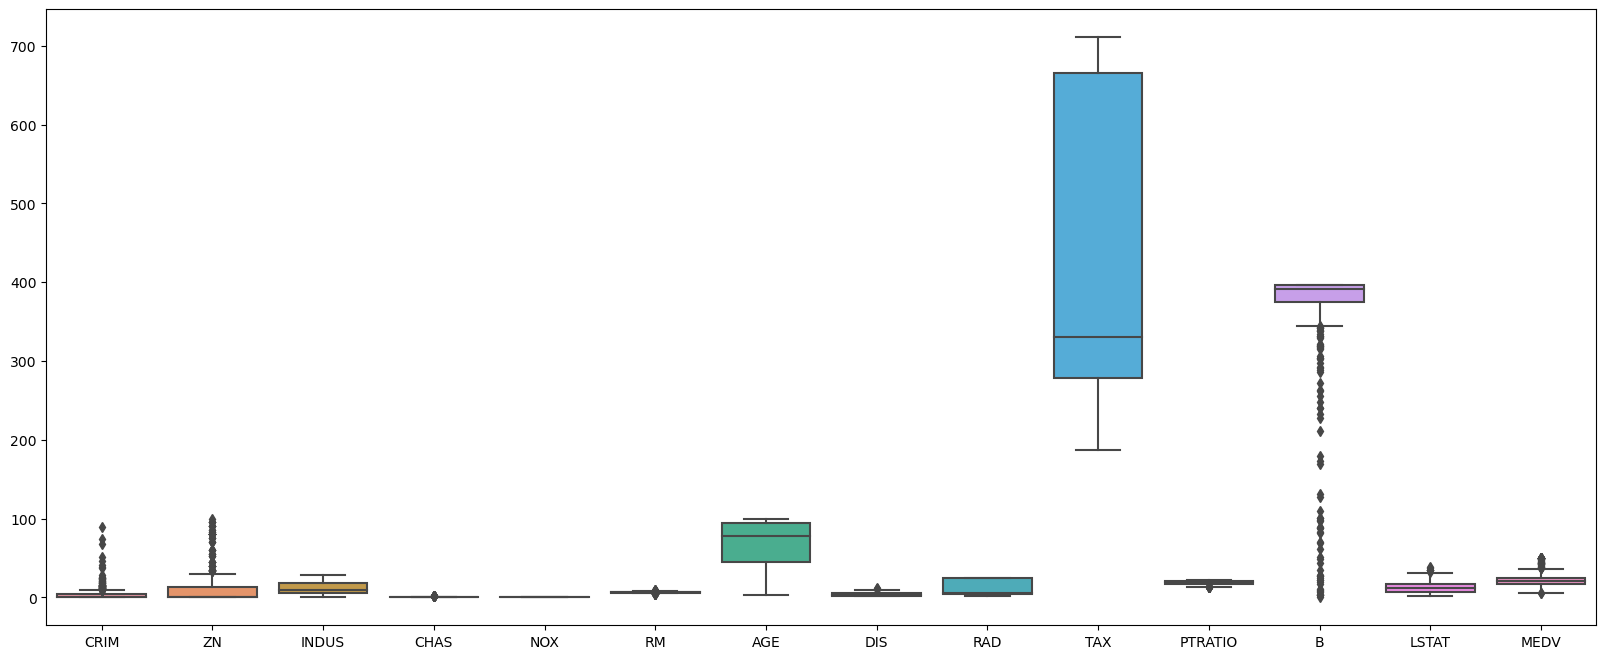

In [8]:
# looking for outliers using box plot

plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

In [9]:
# creating features and label variable

X = df.drop(columns = 'MEDV', axis = 1)
y = df['MEDV']

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 91)

In [13]:
# fitting training data to model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
lr.coef_

array([-1.37055948,  1.1632184 ,  0.19831508,  0.23332472, -2.02742714,
        2.59932784,  0.02932916, -3.33255782,  3.0022841 , -2.46426292,
       -2.16973887,  1.04157357, -3.6014299 ])

In [15]:
lr.intercept_

22.522048349649758

In [16]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.7019799663958441

In [17]:
y_pred = lr.predict(X_test)
r2_score(y_pred, y_test)

0.608473364563033

In [18]:
def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [19]:
print(adj_r2(X_test, y_test, lr))

0.6739056154041483


# Model r2 score is less on the test data so there is chance of overfitting, let's check this using regularization.

In [21]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce th

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce th

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce th

C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Alina\anaconda3\envs\tesnorflow\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce th

RidgeCV(alphas=array([8.21948581, 6.81558433, 7.82071252, 8.53720437, 5.92442569,
       4.02633287, 4.81541049, 8.80849286, 6.39580918, 7.577116  ,
       9.92756022, 5.34770078, 6.52286062, 4.13415963, 7.54186871,
       0.24350133, 3.16566411, 6.50727613, 2.55214228, 1.59173514,
       4.18058877, 9.68780016, 6.09573613, 0.4034681 , 0.99859119,
       2.68449921, 4.20426553, 3.58769922, 0.7187855 , 4.07000455,
       7.44897117, 9.45194169, 7.13687698, 2.67920012, 9.73930528,
       3.18583145, 5.98672682, 8.98597028, 7.41502231, 1.99935654,
       7.98008251, 7.80090055, 3.74316813, 7.55396814, 0.54487534,
       1.38821637, 0.61820876, 7.75802655, 4.90598481, 5.6365236 ]),
        cv=10, normalize=True)

In [22]:
# best alpha parameter

alpha = ridge_cv.alpha_
alpha

0.24350133330821033

In [23]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.24350133330821033)

In [24]:
ridge.coef_

array([-1.36667596,  1.15770747,  0.18781384,  0.23512149, -2.01673087,
        2.60263431,  0.02701991, -3.32277468,  2.9752616 , -2.43855511,
       -2.16567771,  1.04085806, -3.59746454])

In [25]:
ridge.intercept_

22.521332267521974

In [26]:
r2_score(y_pred, y_test)

0.608473364563033

In [27]:
print(adj_r2(X_test, y_test, ridge))

0.6741081266763914


In [28]:
################### Custom Ridge ################

In [29]:
class CustomRidge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        residual = y_test - y_pred
        ssr = np.sum(residual ** 2)
        sst = np.sum((y_test - np.mean(y_test)) ** 2)
        r2_score = 1 - (ssr / sst)
        return r2_score
    
  

In [30]:
reg = CustomRidge(alpha= ridge_cv.alpha_)

In [31]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
reg.score(X_test, y_test)
print(reg.coef_)
print(reg.intercept_)


[-1.36667596  1.15770747  0.18781384  0.23512149 -2.01673087  2.60263431
  0.02701991 -3.32277468  2.9752616  -2.43855511 -2.16567771  1.04085806
 -3.59746454]
22.521332267521966


In [32]:
print(adj_r2(X_test, y_test, reg))

0.6741081266763927


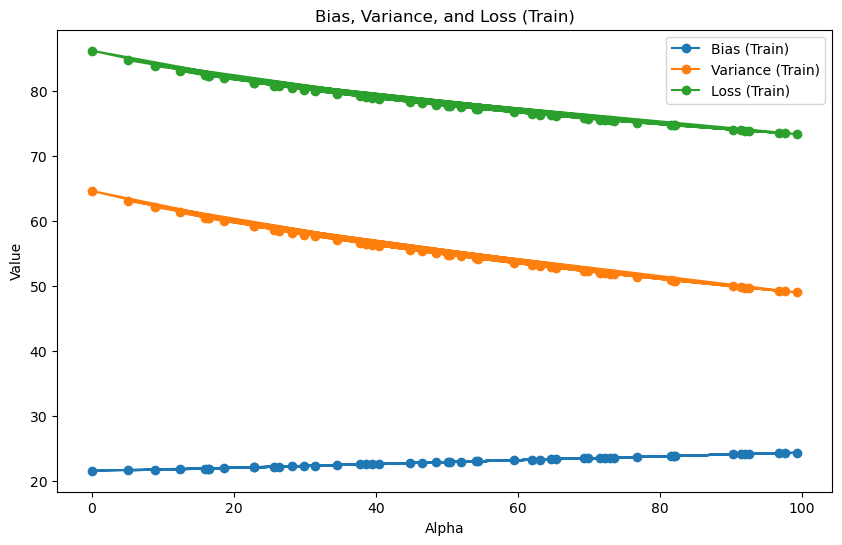

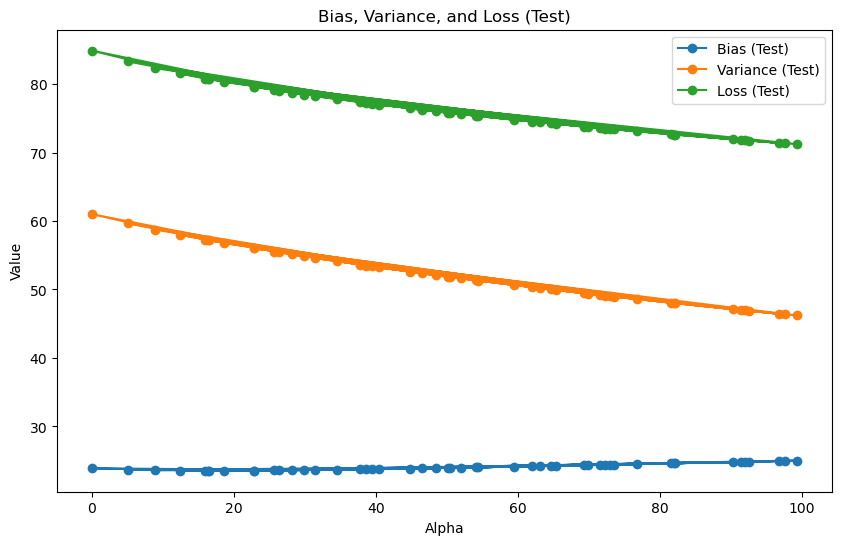

In [38]:
alpha_values =np.random.uniform(0, 100, 50)  # Example alpha values to test
train_bias = []
train_variance = []
train_loss = []
test_bias = []
test_variance = []
test_loss = []

for alpha in alpha_values:
    ridge = CustomRidge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    
    train_bias.append(np.mean((y_train_pred - y_train) ** 2))
    train_variance.append(np.var(y_train_pred))
    train_loss.append(np.mean((y_train_pred - y_train) ** 2) + np.var(y_train_pred))
    
    test_bias.append(np.mean((y_test_pred - y_test) ** 2))
    test_variance.append(np.var(y_test_pred))
    test_loss.append(np.mean((y_test_pred - y_test) ** 2) + np.var(y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_bias, label='Bias (Train)', marker='o')
plt.plot(alpha_values, train_variance, label='Variance (Train)', marker='o')
plt.plot(alpha_values, train_loss, label='Loss (Train)', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Value')
plt.title('Bias, Variance, and Loss (Train)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(alpha_values, test_bias, label='Bias (Test)', marker='o')
plt.plot(alpha_values, test_variance, label='Variance (Test)', marker='o')
plt.plot(alpha_values, test_loss, label='Loss (Test)', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Value')
plt.title('Bias, Variance, and Loss (Test)')
plt.legend()
plt.show()